In [4]:
import sys
sys.path.append('../scripts/')
from kf import*

In [5]:
class GlobalKf(KalmanFilter):
    def __init__(self, envmap, motion_noise_stds = {"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},\
                distance_dev_rate = 0.14, direction_dev = 0.05):
        super().__init__(envmap, np.array([0,0,0]).T, motion_noise_stds, distance_dev_rate, direction_dev)
        self.belief.cov = np.diag([1e+4, 1e+4, 1e+4])

<IPython.core.display.Javascript object>


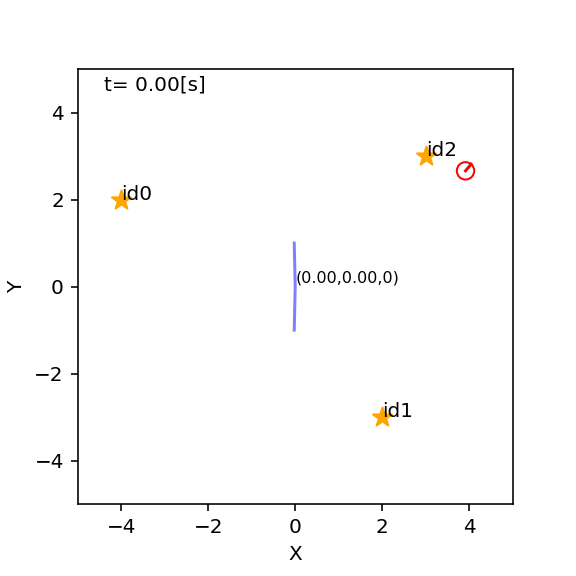

(array([3.91639479, 2.66095039, 0.87172896]), array([0., 0., 0.]))

In [7]:
def trial(animation):
    time_interval = 0.1
    world = World(30,time_interval,debug = not animation)
    
    m = Map()
    for ln in [(-4,2),(2,-3),(3,3)]: m.append_landmark(Landmark(*ln))
    world.append(m)
    
    initial_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    pf = GlobalKf(m,  100)
    a = EstimationAgent(time_interval,0.2,10.0 / 180 * math.pi,pf)
    r = Robot(initial_pose,sensor = Camera(m),agent = a,color = "red") # このカメラ、ファントム、オクルージョン...全部込み込み
    world.append(r)
    
    world.draw()
    return (r.pose, pf.pose)
    
trial(True)